In [220]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder, StandardScaler
#import necessary libraries


In [221]:
house_test_data = pd.read_csv('./data_file/train.csv')
#read the train.csv data file for training the model
house_test_data.describe()
#display summarized contents of the file

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [222]:
house_test_data.head()
#print first five data of the file

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [223]:
house_test_data.columns
#display the all the fields name of the data

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [224]:
for col in house_test_data.columns:
    print(f'{col}: {house_test_data[col].isnull().sum()} null out of {house_test_data[col].shape[0]}')
#display the number of null values in each column

Id: 0 null out of 1460
MSSubClass: 0 null out of 1460
MSZoning: 0 null out of 1460
LotFrontage: 259 null out of 1460
LotArea: 0 null out of 1460
Street: 0 null out of 1460
Alley: 1369 null out of 1460
LotShape: 0 null out of 1460
LandContour: 0 null out of 1460
Utilities: 0 null out of 1460
LotConfig: 0 null out of 1460
LandSlope: 0 null out of 1460
Neighborhood: 0 null out of 1460
Condition1: 0 null out of 1460
Condition2: 0 null out of 1460
BldgType: 0 null out of 1460
HouseStyle: 0 null out of 1460
OverallQual: 0 null out of 1460
OverallCond: 0 null out of 1460
YearBuilt: 0 null out of 1460
YearRemodAdd: 0 null out of 1460
RoofStyle: 0 null out of 1460
RoofMatl: 0 null out of 1460
Exterior1st: 0 null out of 1460
Exterior2nd: 0 null out of 1460
MasVnrType: 872 null out of 1460
MasVnrArea: 8 null out of 1460
ExterQual: 0 null out of 1460
ExterCond: 0 null out of 1460
Foundation: 0 null out of 1460
BsmtQual: 37 null out of 1460
BsmtCond: 37 null out of 1460
BsmtExposure: 38 null out of

In [225]:
categorical_columns = house_test_data.select_dtypes(include=['object']).columns
#select categorical columns
print(categorical_columns)
#display the categorical columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [226]:
#Handling null values

def preprocess_data(df):
    df['LotFrontage'].fillna(value=df['LotFrontage'].median(), inplace=True)        # median due to being a normal distribution

    df.drop(columns=['Alley'], inplace=True)                                        # too many nulls so dropping the column
    df.drop(columns=['MasVnrType'], inplace=True)                                    # too many nulls so dropping the column    

    df['BsmtQual'].fillna(value='TA', inplace=True)                                 # mode
    df['BsmtCond'].fillna(value='TA', inplace=True)                                 # mode
    df['BsmtExposure'].fillna(value='No', inplace=True)                             # mode
    df['BsmtFinType1'].fillna(value='Unf', inplace=True)                            # mode
    df['BsmtFinType2'].fillna(value='Unf', inplace=True)                            # mode
    df['Electrical'].fillna(value='SBrkr', inplace=True)                            # mode

    df.drop(columns=['FireplaceQu'], inplace=True)                                  # too many nulls

    df['GarageType'].fillna(value='Attchd', inplace=True)                           # mode
    df['GarageYrBlt'].fillna(value=df['GarageYrBlt'].mean(), inplace=True)          # mean because it is not normally distributed
    df['GarageFinish'].fillna(value='Unf', inplace=True)                            # mode
    df['GarageQual'].fillna(value='TA', inplace=True)                               # mode
    df['GarageCond'].fillna(value='TA', inplace=True)                               # mode

    df.drop(columns=['PoolQC', 'Fence', 'MiscFeature'], inplace=True)               # too many nulls
    
    # removing outliers in LotArea column
    Q1 = df['LotArea'].quantile(0.25)
    Q3 = df['LotArea'].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    df.loc[(df['LotArea'] < lower_limit) | (df['LotArea'] > upper_limit), 'LotArea'] = np.nan
    df['LotArea'].fillna(value=df['LotArea'].mean(), inplace=True)

    # encoding categorical variables
    categorical_cols = df.select_dtypes(include=['object']).columns
    encoder = LabelEncoder()
    for col in categorical_cols:
        df[col] = encoder.fit_transform(df[col])

    return df

# all visualization to decide the column is normally distributed or not have been done outside this notebook
# also if the mean , median and the mode are close to each other that also means that the column is normally distributed

In [227]:
house_test_data = preprocess_data(house_test_data)
#preprocess the data by filling the null values and encoding the categorical variables

C:\Users\Safal\AppData\Local\Temp\ipykernel_20152\2783676010.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(value=df['LotFrontage'].median(), inplace=True)        # median due to being a normal distribution
C:\Users\Safal\AppData\Local\Temp\ipykernel_20152\2783676010.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermedia

In [228]:
house_test_data.head(10)
#display the first 10 data of the file after preprocessing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450.0,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600.0,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250.0,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550.0,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260.0,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000
5,6,50,3,85.0,14115.0,1,0,3,0,4,...,0,320,0,0,700,10,2009,8,4,143000
6,7,20,3,75.0,10084.0,1,3,3,0,4,...,0,0,0,0,0,8,2007,8,4,307000
7,8,60,3,69.0,10382.0,1,0,3,0,0,...,228,0,0,0,350,11,2009,8,4,200000
8,9,50,4,51.0,6120.0,1,3,3,0,4,...,205,0,0,0,0,4,2008,8,0,129900
9,10,190,3,50.0,7420.0,1,3,3,0,0,...,0,0,0,0,0,1,2008,8,4,118000


In [229]:
house_test_data['TotalBedBath'] = house_test_data['BedroomAbvGr'] + house_test_data['FullBath'] + house_test_data['HalfBath'] + house_test_data['BsmtFullBath'] + house_test_data['BsmtHalfBath']   
#creating a new column TotalBedBath by adding the number of bedrooms and bathrooms

square_footage_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
    'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'PoolArea']

house_test_data['TotalSquareFootage'] = house_test_data[square_footage_cols].sum(axis=1)
#creating a new column TotalSquareFootage by adding the square footage of all the columns


In [230]:
house_test_data.describe()
#display the summarized contents of the file after creating the new columns

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBedBath,TotalSquareFootage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,3.028767,69.863699,9272.537024,0.995890,1.942466,2.777397,0.000685,3.019178,...,15.060959,2.758904,43.489041,6.321918,2007.815753,7.513014,3.770548,180921.195890,5.297260,15248.372640
std,421.610009,42.300571,0.632017,22.027677,3120.225914,0.063996,1.409156,0.707666,0.026171,1.622634,...,55.757415,40.177307,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883,1.385569,4305.892889
min,1.000000,20.000000,0.000000,21.000000,1491.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000,2.000000,4074.000000
25%,365.750000,20.000000,3.000000,60.000000,7560.000000,1.000000,0.000000,3.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,129975.000000,4.000000,12468.000000
50%,730.500000,50.000000,3.000000,69.000000,9272.537024,1.000000,3.000000,3.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163000.000000,5.000000,15047.500000
75%,1095.250000,70.000000,3.000000,79.000000,11107.250000,1.000000,3.000000,3.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,214000.000000,6.000000,18061.000000
max,1460.000000,190.000000,4.000000,313.000000,17671.000000,1.000000,3.000000,3.000000,1.000000,4.000000,...,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000,12.000000,36289.537024


In [231]:
house_test_data['TotalBedBath'].head(10)
#display the first 10 data of the TotalBedBath column

0    7
1    6
2    7
3    5
4    8
5    4
6    6
7    7
8    4
9    4
Name: TotalBedBath, dtype: int64

In [232]:
house_test_data['TotalSquareFootage'].head(10)
#display the first 10 data of the TotalSquareFootage column

0    14452.0
1    15486.0
2    17542.0
3    15505.0
4    22492.0
5    19386.0
6    18053.0
7    18236.0
8    12386.0
9    11815.0
Name: TotalSquareFootage, dtype: float64

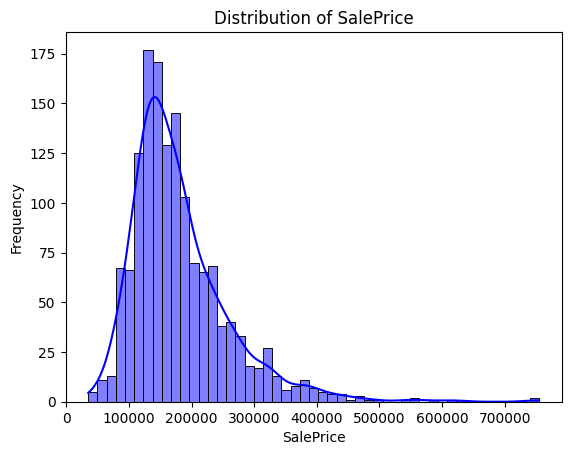

In [233]:
#visualize the sales price (target variable) with the new columns

sns.histplot(house_test_data['SalePrice'], kde=True, color = 'blue')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

In [234]:
#standarize the featrues subset

scaler = StandardScaler()

house_test_data['TotalBedBath'] = scaler.fit_transform(house_test_data[['TotalBedBath']])
house_test_data['TotalSquareFootage'] = scaler.fit_transform(house_test_data[['TotalSquareFootage']])
#standardize the TotalBedBath and TotalSquareFootage columns
#standardize the features subset


In [235]:
house_test_data['TotalBedBath'].head(10)
#display the first 10 data of the TotalBedBath column after standardization

0    1.229331
1    0.507359
2    1.229331
3   -0.214614
4    1.951304
5   -0.936586
6    0.507359
7    1.229331
8   -0.936586
9   -0.936586
Name: TotalBedBath, dtype: float64

In [236]:
house_test_data['TotalSquareFootage'].head(10)
#display the first 10 data of the TotalSquareFootage column after standardization

0   -0.185013
1    0.055205
2    0.532854
3    0.059620
4    1.682835
5    0.961251
6    0.651569
7    0.694084
8   -0.664985
9   -0.797639
Name: TotalSquareFootage, dtype: float64

In [237]:
#data splitting

x = house_test_data[['TotalBedBath', 'TotalSquareFootage']]
y = np.log1p(house_test_data['SalePrice'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#split the data into training and testing data
x_train.shape, x_test.shape, y_train.shape, y_test.shape  



((1168, 2), (292, 2), (1168,), (292,))

In [238]:
np.log1p(house_test_data['SalePrice'])

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [239]:
house_model = LinearRegression()
#creating a linear regression model
house_model.fit(x_train, y_train)


LinearRegression()

In [240]:
y_pred_train = house_model.predict(x_train)
y_pred_test = house_model.predict(x_test)

In [241]:
mse_train = mean_squared_error(y_train , y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"The mean squared error on the training set for the train.csv : {mse_train}")
print(f"The mean squared error on the testing set for the train.csv : {mse_test}")

The mean squared error on the training set for the train.csv : 0.07652951886579225
The mean squared error on the testing set for the train.csv : 0.08521665578891378


In [242]:
# test data
# Load the test data  
test_data = pd.read_csv('data_file/test.csv')  

# Prepare your features for testing (ensure the columns match)  
test_data = preprocess_data(test_data)
# Create the new features in the test data


C:\Users\Safal\AppData\Local\Temp\ipykernel_20152\2783676010.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(value=df['LotFrontage'].median(), inplace=True)        # median due to being a normal distribution
C:\Users\Safal\AppData\Local\Temp\ipykernel_20152\2783676010.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermedia

In [243]:
test_data.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,3.032214,68.334476,9152.258041,0.995888,1.952707,2.776559,0.001371,3.092529,...,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705,7.470185,3.787526
std,421.321334,42.746880,0.691654,20.569211,3202.575148,0.064018,1.410751,0.701340,0.037012,1.585797,...,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740,1.634558,1.055436
min,1461.000000,20.000000,0.000000,21.000000,1470.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000
25%,1825.500000,20.000000,3.000000,60.000000,7391.000000,1.000000,0.000000,3.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,8.000000,4.000000
50%,2190.000000,50.000000,3.000000,67.000000,9152.258041,1.000000,3.000000,3.000000,0.000000,4.000000,...,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000
75%,2554.500000,70.000000,3.000000,78.000000,11026.000000,1.000000,3.000000,3.000000,0.000000,4.000000,...,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000
max,2919.000000,190.000000,5.000000,200.000000,17597.000000,1.000000,3.000000,3.000000,1.000000,4.000000,...,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,9.000000,5.000000


In [244]:
test_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622.0,1,3,3,0,4,...,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3,81.0,14267.0,1,0,3,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3,74.0,13830.0,1,0,3,0,4,...,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3,78.0,9978.0,1,0,3,0,4,...,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3,43.0,5005.0,1,0,1,0,4,...,82,0,0,144,0,0,1,2010,8,4
5,1466,60,3,75.0,10000.0,1,0,3,0,0,...,84,0,0,0,0,0,4,2010,8,4
6,1467,20,3,67.0,7980.0,1,0,3,0,4,...,21,0,0,0,0,500,3,2010,8,4
7,1468,60,3,63.0,8402.0,1,0,3,0,4,...,75,0,0,0,0,0,5,2010,8,4
8,1469,20,3,85.0,10176.0,1,3,3,0,4,...,0,0,0,0,0,0,2,2010,8,4
9,1470,20,3,70.0,8400.0,1,3,3,0,0,...,0,0,0,0,0,0,4,2010,8,4


In [245]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclo

In [246]:
for col in test_data.columns:
    print(f'{col}: {test_data[col].isnull().sum()} null out of {test_data[col].shape[0]}')
#display the number of null values in each column

Id: 0 null out of 1459
MSSubClass: 0 null out of 1459
MSZoning: 0 null out of 1459
LotFrontage: 0 null out of 1459
LotArea: 0 null out of 1459
Street: 0 null out of 1459
LotShape: 0 null out of 1459
LandContour: 0 null out of 1459
Utilities: 0 null out of 1459
LotConfig: 0 null out of 1459
LandSlope: 0 null out of 1459
Neighborhood: 0 null out of 1459
Condition1: 0 null out of 1459
Condition2: 0 null out of 1459
BldgType: 0 null out of 1459
HouseStyle: 0 null out of 1459
OverallQual: 0 null out of 1459
OverallCond: 0 null out of 1459
YearBuilt: 0 null out of 1459
YearRemodAdd: 0 null out of 1459
RoofStyle: 0 null out of 1459
RoofMatl: 0 null out of 1459
Exterior1st: 0 null out of 1459
Exterior2nd: 0 null out of 1459
MasVnrArea: 15 null out of 1459
ExterQual: 0 null out of 1459
ExterCond: 0 null out of 1459
Foundation: 0 null out of 1459
BsmtQual: 0 null out of 1459
BsmtCond: 0 null out of 1459
BsmtExposure: 0 null out of 1459
BsmtFinType1: 0 null out of 1459
BsmtFinSF1: 1 null out of 1

In [247]:
test_data = test_data.dropna()

In [248]:
test_data['TotalBedBath'] = test_data['BedroomAbvGr'] + test_data['FullBath'] + test_data['HalfBath'] + test_data['BsmtFullBath'] + test_data['BsmtHalfBath']   
#creating a new column TotalBedBath by adding the number of bedrooms and bathrooms


test_data['TotalSquareFootage'] = test_data[square_footage_cols].sum(axis=1)
#creating a new column TotalSquareFootage by adding the square footage of all the columns


In [249]:
X_test = test_data[['TotalBedBath', 'TotalSquareFootage']]
#standardize the features subset

In [250]:
# Predict on the test set  
y_pred = house_model.predict(X_test)  

In [251]:
test_data['SalePrice'] = y_pred

In [252]:
print(test_data['SalePrice'])

0       3419.825915
1       4314.510348
2       4153.789807
3       3368.624446
4       2298.410257
           ...     
1454    1110.096162
1455    1166.299238
1456    3212.652111
1457    3028.130988
1458    3509.761275
Name: SalePrice, Length: 1441, dtype: float64
